# Initialize

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://drive.google.com/file/d/1qArHfZBjjxM0Z7eQf-aVE4PmH6AjCAEq/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

path = "gun_death.csv"

df = pd.read_csv(path)

df.head(10)

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
5,6,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,Less than HS
6,7,2012,2,Undetermined,0,M,48.0,White,100,Home,HS/GED
7,8,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,HS/GED
8,9,2012,2,Accidental,0,M,50.0,White,100,Other specified,Some college
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,NaN


# 1. Annual suicide gun deaths from 2012 to 2014

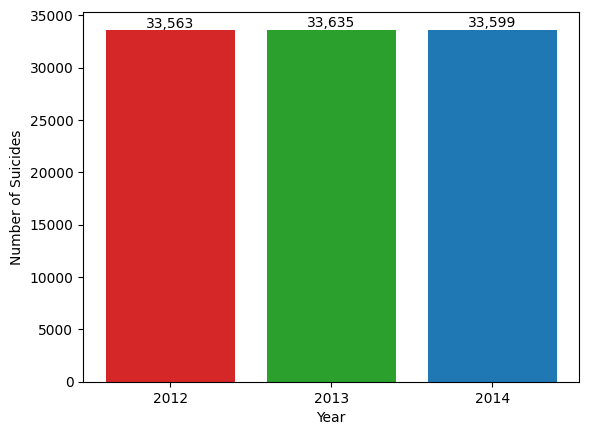

In [25]:
data = df

suicide = data.groupby(['year'])['intent'].count()

# suicide

bar_container = plt.bar(suicide.index.astype(str), suicide, color=['tab:red', 'tab:green', 'tab:blue'])
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.bar_label(bar_container, fmt='{:,.0f}')

plt.show()

# 2. Average annual death toll from guns 2012 to 2014 (by race)

<Figure size 2000x1600 with 0 Axes>

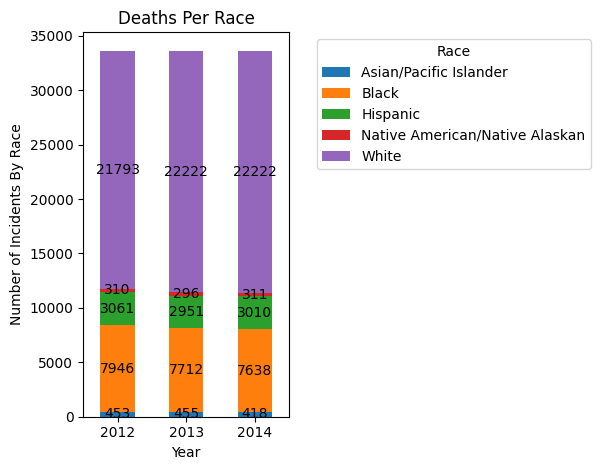

In [54]:
data = df

n = 0

# Count incidents by year and intent (filtering with boolean indexing)
race = data.groupby(['year', 'race'])['race'].count().unstack(fill_value=0)

total = race.sum(axis=1)
years = race.index.get_level_values('year').tolist()

# Create a bar chart
plt.figure(figsize=(20, 16))
race.plot(kind='bar', stacked=True)
plt.title('Deaths Per Race')
plt.xlabel('Year')
plt.ylabel('Number of Incidents By Race')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Race', bbox_to_anchor=(1.1,1))  # Add legend to show intent
for _ in plt.gca().containers:
  plt.bar_label(plt.gca().containers[n], label_type='center')
  n+=1
plt.tight_layout()
plt.show()

# 3. Annual gun deaths from 2012 to 2014 (by place)

<Figure size 1000x600 with 0 Axes>

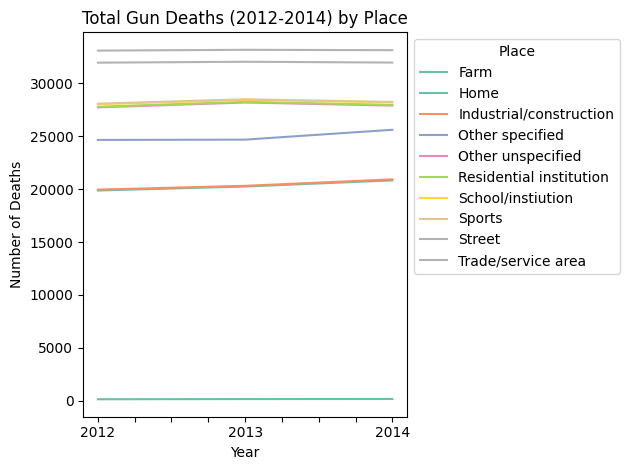

In [ ]:
data = df

data['year'] = data['year'].astype(str)

# Count entries (suicides) by year and race
race_deaths = data.groupby(['year', 'place'])['place'].count().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
race_deaths.plot(stacked=True, colormap='Set2')  # Using colormap for races
plt.title('Total Gun Deaths (2012-2014) by Place')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Place', bbox_to_anchor=(1, 1))  # Add legend to show races
plt.tight_layout()
plt.show()

# 4. Annual gun deaths from 2012 to 2014 (by intent - homicide, suicide)

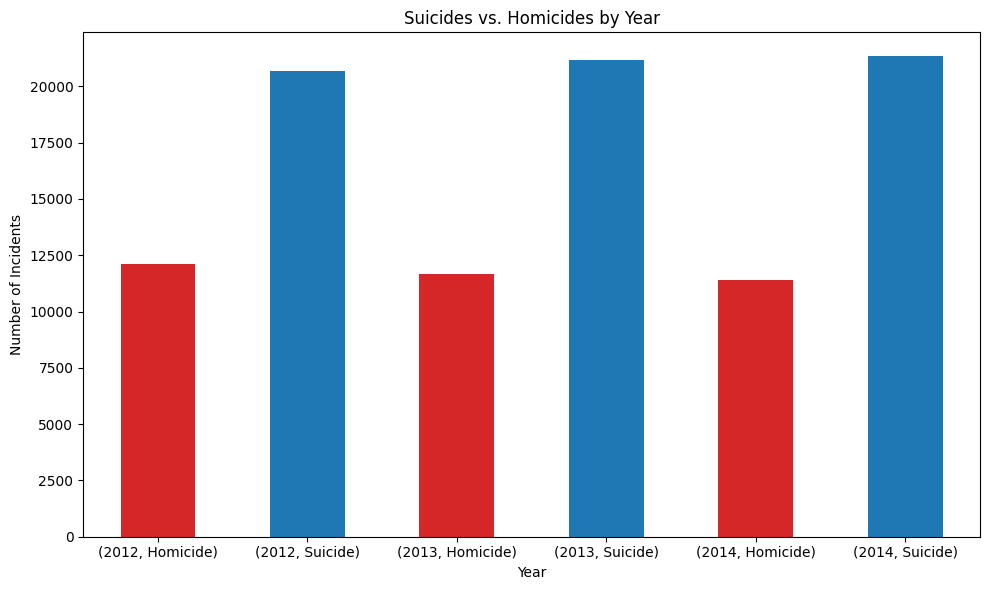

In [ ]:
data = df

suicide = data[data['intent'].isin(['Suicide', 'Homicide'])].groupby(['year', 'intent'])['intent'].count()

# suicide
intent_colors = {'tab:red', 'tab:blue'}

# Create a bar chart
plt.figure(figsize=(10, 6))
suicide.plot(kind='bar', color=intent_colors)
plt.title('Suicides vs. Homicides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 5. Percentage of annual suicide gun deaths from 2012 to 2014 (by year)

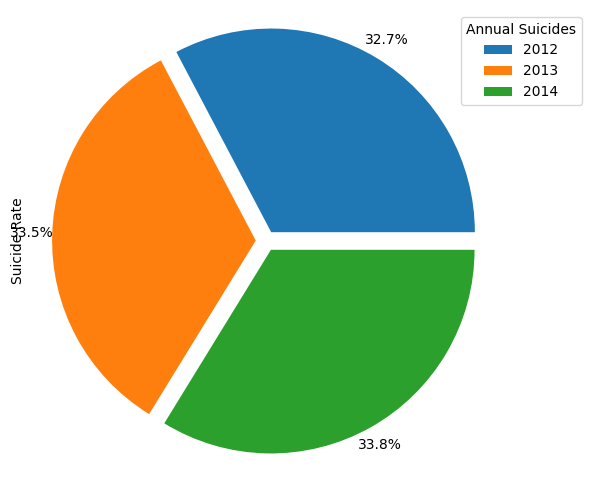

In [ ]:
data = df 

suicide = data[data['intent'] =='Suicide'].groupby(['year'])['intent'].count()

suicide

num_cases = len(suicide)
explode = [0.05] * num_cases

suicide.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', labeldistance=None, pctdistance=1.1, explode=explode)
plt.ylabel('Suicide Rate')
plt.axis('equal')
plt.legend(suicide.index, title='Annual Suicides', loc='upper right', bbox_to_anchor=(1.2,1))

plt.show()